In [1]:
import numpy as np
import sklearn  as sk
from sklearn import datasets
import matplotlib.pyplot as plt


–ó–∞–¥–∞–Ω–∏–µ ‚Ññ1


–°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –ø—Ä–∏ –ø–æ–º–æ—â–∏ sklearn.datasets.make_regression –∏ –æ–±—É—á–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –∏ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞. –ù–∞–Ω–µ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –æ—à–∏–±–∫—É –¥–ª—è –æ–±–æ–∏—Ö –º–µ—Ç–æ–¥–æ–≤ –Ω–∞ –æ–¥–∏–Ω –≥—Ä–∞—Ñ–∏–∫, —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ —Ä–∞–∑–Ω–∏—Ü–µ —Å–∫–æ—Ä–æ—Å—Ç–∏ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –º–µ—Ç–æ–¥–æ–≤.


In [2]:
data, target, coef = datasets.make_regression(n_samples=100000, n_features = 1, n_informative = 1, 
                                                 n_targets = 1, noise = 10, coef = True, random_state = 3)

In [3]:
coef

array(85.59724823)

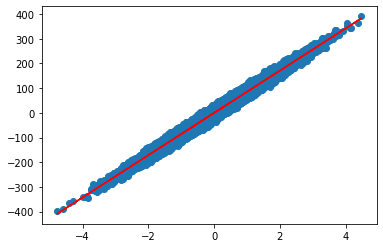

In [4]:
plt.scatter(data,target)
plt.plot(data,coef*data,color = 'red')
plt.show()

–î–æ–±–∞–≤–∏–º —Å–≤–æ–±–æ–¥–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –∏–∑ –µ–¥–µ–Ω–∏—Ü –¥–ª—è –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∏–Ω—Ç–µ—Ä—Ü–µ–ø—Ç–∞

In [5]:
a=np.ones(len(data))
data = np.hstack((np.column_stack(a).reshape(-1,1),data))

In [6]:
data

array([[ 1.        , -1.22022   ],
       [ 1.        ,  0.32669378],
       [ 1.        , -2.37452056],
       ...,
       [ 1.        ,  0.65977606],
       [ 1.        ,  0.54330925],
       [ 1.        ,  0.48459046]])

In [7]:
data.shape

(100000, 2)

In [8]:
# –§—É–Ω–∫—Ü–∏—è –æ—à–∏–±–∫–∏
def mse(y_pred,y):
    return ((y_pred - y)**2).mean()

In [9]:
# –ö–æ—ç—Ñ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏
def R2(y_pred,y):
    return 1- ((y_pred - y)**2).sum()/((y-y.mean())**2).sum()

In [10]:
# –§—É–Ω–∫—Ü–∏—è –≤—ã–≤–æ–¥–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è
def print_result(y_pred,y,W_classic,iter_classic):
    print('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞')
    print(f'–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W \n {W_classic}')
    print(f'–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  {iter_classic[-1]},–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ {min(iter_classic)}')
    print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - {len(iter_classic)}')
    print(f'–∫–æ—ç—Ñ. R2  - {R2(y_pred,y)}')

In [11]:
# –§—É–Ω–∫—Ü–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–≥–æ —Å–ø—É—Å–∫–∞
def gradient_descent(X,Y,alpha=0.01,count_iter_max = int(1e4),criteriy =1e-8 ):
    number_obj,number_features = X.shape
    Wr = np.random.randn(number_features).reshape(-1,1)
    data=[]
    for  i in range(count_iter_max):
        Y_pred = X@Wr
        data.append(mse(Y_pred,Y))
        delta = Y_pred-Y
        Wr_old = Wr.copy()
        Wr-=alpha*2/number_obj*(X.T@delta)
        if (((Wr-Wr_old).T@(Wr-Wr_old)))**(1/2)<criteriy:
            print_result(Y_pred,Y,Wr,data)
            return Wr,data  
    print_result(Y_pred,Y,Wr,data)    
    return Wr,data  

–ü—Ä–æ–≤–µ–¥–µ–º —Ä–∞—Å—á–µ—Ç –ø–æ –Ω–∞—à–∏–º –¥–∞–Ω–Ω—ã–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞

In [12]:
W_classic, iter_classic = gradient_descent(data,target.reshape(-1,1) )

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-1.59112256e-02]
 [ 8.55752399e+01]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  99.31363482481758,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.31363482481758
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 946
–∫–æ—ç—Ñ. R2  - 0.9865324075761069


–ü–æ–ø–æ—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ 70% –≤—ã–±–æ—Ä–∫–∏, –∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ–∑—É–ª—å—Ç—Ç–æ–≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è 30%

In [13]:
# –§—É–Ω–∫—Ü–∏—è –¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ , –æ–±—É—á–µ–Ω–∏—è –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è –æ–±—ã—á–Ω–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
def check_training(data):
    a = np.arange(len(data))
    ind_train= np.random.choice(a,size= int(len(data)*0.7),replace=False)
    X_train =  data[ind_train]
    y_train =target[ind_train]
    X_test = np.delete(data,ind_train,axis=0)
    y_test = np.delete(target,ind_train,axis=0)
    W, it = gradient_descent(X_train,y_train.reshape(-1,1))
    y_pred = X_test@W
    print(30*'-')
    print('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏')
    print(f'–û—à–∏–±–∫–∞ - {mse(y_pred,y_test.reshape(-1,1))}')
    print(f'–ö–æ—ç—Ñ  - {R2(y_pred,y_test.reshape(-1,1))}')
    plt.scatter( X_test[:,1] ,    y_pred,color = 'red')
    plt.scatter( X_test[:,1] ,    y_test)

In [14]:
# –§—É–Ω–∫—Ü–∏—è –¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ , –æ–±—É—á–µ–Ω–∏—è –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è –æ–±—ã—á–Ω–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ L2
def check_training_l2(data,k):
    a = np.arange(len(data))
    ind_train= np.random.choice(a,size= int(len(data)*0.7),replace=False)
    X_train =  data[ind_train]
    y_train =target[ind_train]
    X_test = np.delete(data,ind_train,axis=0)
    y_test = np.delete(target,ind_train,axis=0)
    W, it = gradient_descent_l2(X_train,y_train.reshape(-1,1),k=k)
    y_pred = X_test@W
    print(30*'-')
    print('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏')
    print(f'–û—à–∏–±–∫–∞ - {mse(y_pred,y_test.reshape(-1,1))}')
    print(f'–ö–æ—ç—Ñ  - {R2(y_pred,y_test.reshape(-1,1))}')
    plt.scatter( X_test[:,1] ,    y_pred,color = 'red')
    plt.scatter( X_test[:,1] ,    y_test)

In [15]:
# –§—É–Ω–∫—Ü–∏—è –¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ , –æ–±—É—á–µ–Ω–∏—è –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è –æ–±—ã—á–Ω–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ L1
def check_training_l1(data,k):
    a = np.arange(len(data))
    ind_train= np.random.choice(a,size= int(len(data)*0.7),replace=False)
    X_train =  data[ind_train]
    y_train =target[ind_train]
    X_test = np.delete(data,ind_train,axis=0)
    y_test = np.delete(target,ind_train,axis=0)
    W, it = gradient_descent_l1(X_train,y_train.reshape(-1,1),k=k)
    y_pred = X_test@W
    print(30*'-')
    print('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏')
    print(f'–û—à–∏–±–∫–∞ - {mse(y_pred,y_test.reshape(-1,1))}')
    print(f'–ö–æ—ç—Ñ  - {R2(y_pred,y_test.reshape(-1,1))}')
    plt.scatter( X_test[:,1] ,    y_pred,color = 'red')
    plt.scatter( X_test[:,1] ,    y_test)

In [16]:
# –§—É–Ω–∫—Ü–∏—è –¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ , –æ–±—É—á–µ–Ω–∏—è –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
def check_training_st(data):
    a = np.arange(len(data))
    ind_train= np.random.choice(a,size= int(len(data)*0.7),replace=False)
    X_train =  data[ind_train]
    y_train =target[ind_train]
    X_test = np.delete(data,ind_train,axis=0)
    y_test = np.delete(target,ind_train,axis=0)
    W, it = s_gradient_descent(X_train,y_train.reshape(-1,1))
    y_pred = X_test@W
    print(30*'-')
    print('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏')
    print(f'–û—à–∏–±–∫–∞ - {mse(y_pred,y_test.reshape(-1,1))}')
    print(f'–ö–æ—ç—Ñ  - {R2(y_pred,y_test.reshape(-1,1))}')
    plt.scatter( X_test[:,1] ,    y_pred,color = 'red')
    plt.scatter( X_test[:,1] ,    y_test)

–ó–∞–ø—Å—É—Å—Ç–∏–º —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –∏ –æ–±—É—á–µ–Ω–∏–µ–º –Ω–∞ –æ–±—ã—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ –æ–±—ã—á–Ω–æ–º—É –≥—Ä. —Å–ø—É—Å–∫—É

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-1.91022880e-02]
 [ 8.55501033e+01]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  99.5006192576357,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.5006192576357
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 945
–∫–æ—ç—Ñ. R2  - 0.9864999844749841
------------------------------
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
–û—à–∏–±–∫–∞ - 98.87946292179394
–ö–æ—ç—Ñ  - 0.9866076009356546


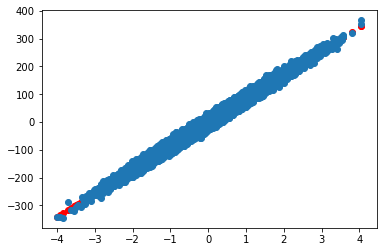

In [17]:
check_training(data)

—Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫

In [18]:
# –§—É–Ω–∫—Ü–∏—è —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä. —Å–ø—É—Å–∫–∞
def s_gradient_descent(X,Y,alpha=0.01,count_iter_max = 10000,criteriy =1e-5):
    number_obj,number_features = X.shape
    Wr = np.zeros((number_features,1))
    data=[]
    for  i in range(count_iter_max):
        item = np.random.randint(number_obj)
        Y_pred = X[item]@Wr
        data.append(mse(X@Wr,Y))
        delta = Y_pred-Y[item]
        Wr_old = Wr.copy()
        Wr-=alpha*2*delta*X[item].reshape(-1,1)
        if np.linalg.norm(Wr-Wr_old,ord = 2)<criteriy:
            print_result(X@Wr,Y,Wr,data)
            return Wr,data
    print_result(X@Wr,Y,Wr,data)    
    return Wr,data  

In [19]:
W_s, iter_s = s_gradient_descent(data,target.reshape(-1,1) )

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[ 0.96329377]
 [84.30254484]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  101.88731360091633,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.31471041121507
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 931
–∫–æ—ç—Ñ. R2  - 0.986183397605012


–ü–æ–ø–æ—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ 70% –≤—ã–±–æ—Ä–∫–∏, –∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ–∑—É–ª—å—Ç—Ç–æ–≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è 30%, –¥–ª—è —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ —Å–ø—É—Å–∫–∞

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-0.57585282]
 [83.83518316]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  102.68789097038074,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.32260245558706
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 1104
–∫–æ—ç—Ñ. R2  - 0.9861322015408627
------------------------------
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
–û—à–∏–±–∫–∞ - 102.4968567982794
–ö–æ—ç—Ñ  - 0.9859651397451437


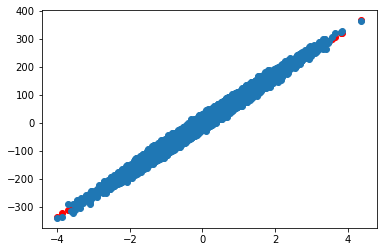

In [20]:
check_training_st(data)

–ù–∞—Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ –æ—à–∏–±–æ–∫ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏

In [21]:
x1 = [i for i in range(1,len(iter_classic)+1) ]
x2 = [i for i in range(1,len(iter_s)+1) ]

<function matplotlib.pyplot.show(*args, **kw)>

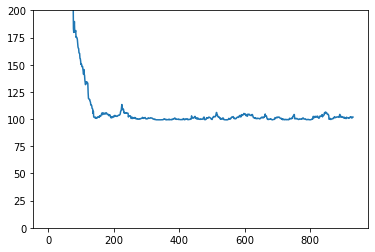

In [22]:
# "–û—à–∏–±–∫–∞ –≤ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–º —Å–ø—É—Å–∫–µ"
plt.ylim(0, 200)
plt.plot(x2,iter_s)
plt.show

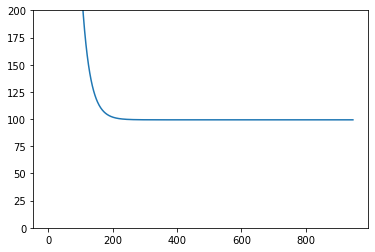

In [23]:
# –û—à–∏–±–∫–∞ –ø—Ä–∏ –æ–±—ã—á–Ω–æ–º —Å–ø—É—Å–∫–µ
plt.ylim(0, 200)
plt.plot(x1,iter_classic)

–ù–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –º–∞—Å—à—Ç–∞–±—ã –Ω–µ –ø–æ–∑–≤–æ–ª—è—é—Ç –Ω–∞—Ä–∏—Å–æ–≤–∞—Ç—å. –ß—Ç–æ –±—ã –¥–æ—Å—Ç–∏—á —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏.
–°—Ç–∞—Ö–æ—Å—Ç–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥ —Ç—Ä–µ–±—É–µ—Ç –∫—É–¥–∞ –±–æ–ª—å—à–µ –æ–ø–µ—Ä–µ–∞—Ü–∏–π –∏ –≤—Ä–µ–º–µ–Ω–∏. –î–∞–µ—Ç –º–µ–Ω–µ–µ —Ç–æ—á–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

–ü–æ–ø—Ä–æ–±—É–µ–º –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –ø—Ä–æ–¥–µ–ª–∞—Ç—å —Ç–æ –∂–µ —Å–∞–º–æ–µ

In [24]:
def norm(a):
    return (a-a.min())/(a.max()-a.min())

In [25]:
data1= data.copy()

In [26]:
for i in range(1, data1.shape[1]):
    data1[:,i] = norm(data1[:,i])


In [27]:
data1.max(axis=0),data1.min(axis = 0)

(array([1., 1.]), array([1., 0.]))

–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π —Å–ø—É—Å–∫

In [28]:
W_classic, iter_classic = gradient_descent(data1,target.reshape(-1,1),alpha=0.01,count_iter_max = int(1e5),criteriy =1e-6 )

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-409.35138  ]
 [ 792.3688588]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  99.31363509856033,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.31363509856033
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 65726
–∫–æ—ç—Ñ. R2  - 0.9865324075389856


–∫–ª–∞—Å–∏—á–µ—Å–∫–∏–π —Å–ø—É—Å–∫ —Å –æ–±—É—á–µ–Ω–∏–µ–º –∏ —Ç–µ—Å—Ç–æ–º

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-342.88569697]
 [ 664.93585144]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  287.91197759973466,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 287.91197759973466
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 10000
–∫–æ—ç—Ñ. R2  - 0.9609451983248599
------------------------------
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
–û—à–∏–±–∫–∞ - 288.1467412180382
–ö–æ—ç—Ñ  - 0.9609499094884901


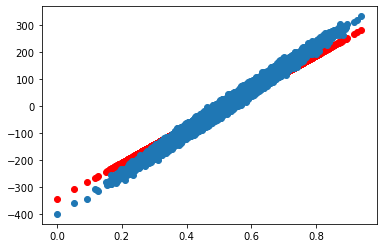

In [29]:
check_training(data1)

–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π —Å–ø—É—Å–∫ –ø–æ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º

In [30]:
W_s, iter_s = s_gradient_descent(data1,target.reshape(-1,1) ,alpha=0.01,count_iter_max = 100000,criteriy =1e-5)

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-410.7325388 ]
 [ 792.29724691]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  101.3247151405091,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.313642518568
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 43015
–∫–æ—ç—Ñ. R2  - 0.9862596875581374


–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π —Å–ø—É—Å–∫ –ø–æ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º —Å –æ–±—É—á–µ–Ω–∏–µ–º –∏ —Ç–µ—Å—Ç–æ–º

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-345.12602386]
 [ 660.48175694]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  309.4543863727977,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 300.66195043537556
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 10000
–∫–æ—ç—Ñ. R2  - 0.9572375091664891
------------------------------
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
–û—à–∏–±–∫–∞ - 314.7656781963347
–ö–æ—ç—Ñ  - 0.9569841988265296


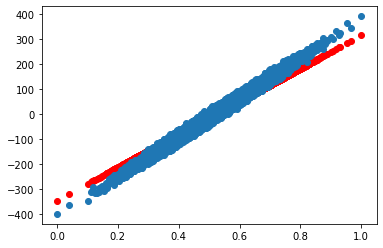

In [31]:
check_training_st(data1)

–ü–æ–ø—Ä–æ–±—É–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é
–í—Å–µ –æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [32]:
def stand(a):
    return (a-a.mean())/a.std()

In [33]:
data2= data.copy()

In [34]:
for i in range(1, data2.shape[1]):
    data2[:,i] = stand(data2[:,i])


In [35]:
W_classic, iter_classic = gradient_descent(data2,target.reshape(-1,1) )

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-0.21305565]
 [85.2933421 ]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  99.31363482481758,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.31363482481758
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 940
–∫–æ—ç—Ñ. R2  - 0.9865324075761069


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-0.21750879]
 [85.29591562]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  99.64071554827125,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.64071554827125
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 939
–∫–æ—ç—Ñ. R2  - 0.9865068909708717
------------------------------
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
–û—à–∏–±–∫–∞ - 98.55053463985917
–ö–æ—ç—Ñ  - 0.9865921889810242


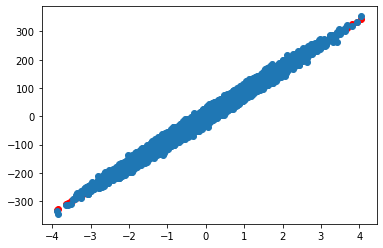

In [36]:
check_training(data2)

In [37]:
W_s, iter_s = s_gradient_descent(data2,target.reshape(-1,1) )

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-1.24034256]
 [85.686405  ]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  100.52344124807738,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.31420752189038
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 1569
–∫–æ—ç—Ñ. R2  - 0.986368348382881


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-0.17084601]
 [82.70347638]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  105.52573040082697,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 98.62862374276447
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 9489
–∫–æ—ç—Ñ. R2  - 0.9857547263017837
------------------------------
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
–û—à–∏–±–∫–∞ - 107.18266561790587
–ö–æ—ç—Ñ  - 0.9853095743900966


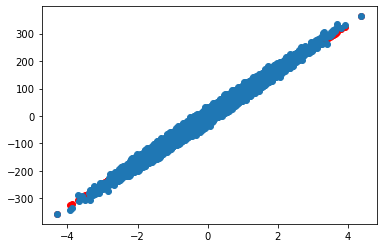

In [38]:
check_training_st(data2)

–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏ –¥–∞–ª–∞ —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

–ó–∞–¥–∞–Ω–∏–µ ‚Ññ 2

–ú–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è –ø—É—Ç–µ–º –¥–æ–±–∞–≤–ª–µ–Ω–∏—è  ùêø2 -—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ (–≤ —Ñ—É–Ω–∫—Ü–∏—é, —Å—á–∏—Ç–∞—é—â—É—é MSE, –Ω—É–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –Ω–æ—Ä–º—É –≤–µ–∫—Ç–æ—Ä–∞ –≤–µ—Å–æ–≤) –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

–î–ª—è —Ä–∞—Å—á–µ—Ç–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞, –ö –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π —Ü–µ–ª–µ–≤–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –Ω—É–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —Å–ª–∞–≥–∞–µ–º–æ–µ, –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é –æ—Ç w1^2+w2^2+....Wn^2
—Ç–æ–≥–¥–∞ –≥—Ä–∞–¥–∏–Ω–µ—Ç –ø–æ w1 = 2*w1 + w2^2+....Wn^2, –≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ w2 = w1^2+2*w2+....Wn^2 ....
–ß—Ç–æ –±—ã —ç—Ç–æ –ø–æ–ª—É—á–∏—Ç—å, –Ω—É–∂–Ω–æ —Å–¥–ª–µ–∞—Ç—å –º–∞—Ç—Ä–∏—Ü—É –∏–∑ —Å—Ç—Ä–æ–∫ W, –ø–æ –≥–ª–∞–≤–Ω–æ–π –¥–∏–∞–≥–æ–Ω–∞–ª–∏ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥—É—Ç –¥–≤–æ–π–∫–∏


In [39]:
def mse_l2(y_pred,y,W,k=0.001):
    return ((y_pred - y)**2).mean()+k*(W*W).sum()

In [40]:
# –§—É–Ω–∫—Ü–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–≥–æ —Å–ø—É—Å–∫–∞  c ùêø2 -—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
def gradient_descent_l2(X,Y,alpha=0.01,count_iter_max = int(1e5),criteriy =1e-8,k=0.001):
    number_obj,number_features = X.shape
    Wr = np.random.randn(number_features).reshape(-1,1)
    data=[]
    for  i in range(count_iter_max):
        Y_pred = X@Wr
        data.append(mse_l2(Y_pred,Y,Wr,k=k))
        delta = Y_pred-Y
        Wr_old = Wr.copy()
        Wr-=alpha*2/number_obj*(X.T@delta)+2*k*Wr
        if (((Wr-Wr_old).T@(Wr-Wr_old)))**(1/2)<criteriy:
            print_result(Y_pred,Y,Wr,data)
            return Wr,data  
    print_result(Y_pred,Y,Wr,data)    
    return Wr,data  

In [41]:
W_classic, iter_classic = gradient_descent_l2(data,target.reshape(-1,1),k=0.001 )

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-3.08556823e-02]
 [ 7.77488814e+01]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  166.2075478360374,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 166.2075478360374
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 859
–∫–æ—ç—Ñ. R2  - 0.9782808734394647


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-1.81178725e-02]
 [ 7.77493327e+01]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  166.5732569802727,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 166.5732569802727
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 861
–∫–æ—ç—Ñ. R2  - 0.9781786898027921
------------------------------
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
–û—à–∏–±–∫–∞ - 159.28690951875598
–ö–æ—ç—Ñ  - 0.978519109502058


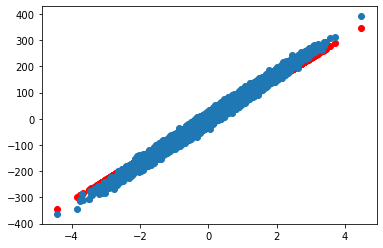

In [42]:
check_training_l2(data,k=0.001)

L1

In [43]:
def mse_l1(y_pred,y,W,k=0.001):
    return ((y_pred - y)**2).mean()+k*np.abs(W).sum()

In [44]:
# –§—É–Ω–∫—Ü–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–≥–æ —Å–ø—É—Å–∫–∞  c ùêø1 -—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
def gradient_descent_l1(X,Y,alpha=0.01,count_iter_max = int(1e4),criteriy =1e-8,k=0.001):
    number_obj,number_features = X.shape
    Wr = np.random.randn(number_features).reshape(-1,1)
    data=[]
    for  i in range(count_iter_max):
        Y_pred = X@Wr
        data.append(mse_l1(Y_pred,Y,Wr,k=k))
        delta = Y_pred-Y
        Wr_old = Wr.copy()
        W_delta = np.array([])
        for j in Wr:
            if j>0:
                W_delta = np.append(W_delta, k)
            elif j<0:
                W_delta=np.append(W_delta, -k)
            else:
                W_delta = np.append(W_delta, 0)    
        W_delta = W_delta.reshape(-1,1) 
        Wr-=alpha*2/number_obj*(X.T@delta)+2*W_delta
        if (((Wr-Wr_old).T@(Wr-Wr_old)))**(1/2)<criteriy:
            print_result(Y_pred,Y,Wr,data)
            return Wr,data  
    print_result(Y_pred,Y,Wr,data)    
    return Wr,data  

In [45]:
W_classic, iter_classic = gradient_descent_l1(data,target.reshape(-1,1),k=0.001 )

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-2.05894013e-03]
 [ 8.54746149e+01]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  99.40943795759506,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.40936332407755
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 10000
–∫–æ—ç—Ñ. R2  - 0.9865310069965945


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è  –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
–ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç W 
 [[-1.85286317e-03]
 [ 8.54832103e+01]]
–ø–æ—Å–ª–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ -  99.17182728832522,–º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ 99.1718069319093
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π  - 10000
–∫–æ—ç—Ñ. R2  - 0.9865274265212697
------------------------------
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
–û—à–∏–±–∫–∞ - 99.8727537300121
–ö–æ—ç—Ñ  - 0.9865393489211511


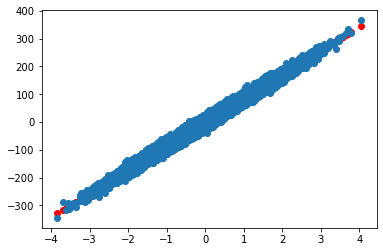

In [46]:
check_training_l1(data,k=0.001)